# AAL for ADNI patients; comparison CN --> EMCI --> LMCI --> AD

All the imports and installs we'll need.


In [6]:
import os
#import torch
#from torch import nn
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

#import networkx as nx
#from networkx.convert_matrix import from_numpy_matrix

In [7]:

from nilearn import datasets

# Load the AAL atlas
aal = datasets.fetch_atlas_aal()

# Access the labels and coordinates
atlas_labels = aal['labels']
atlas_coords = aal['maps']

# Print the labels and corresponding indices
for i, label in enumerate(atlas_labels):
    if 'ventricle' in label.lower() or 'hippo' in label.lower() or 'entorhinal' in label.lower() or 'fusiform' in label.lower():
        print(f"Index {i}: {label}")

        
# ROI concerning hyppocampus in the AAL atlas:
# 37, 38, 39, 40

Index 36: Hippocampus_L
Index 37: Hippocampus_R
Index 38: ParaHippocampal_L
Index 39: ParaHippocampal_R
Index 54: Fusiform_L
Index 55: Fusiform_R


In [8]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom

In [9]:

# WITH the AAL atlas

# CN, control person

# Define the directory containing DICOM files
dicom_folder = "/Users/mariamannone/Downloads/ADNI 8/018_S_4399/Resting_State_fMRI/2012-05-02_09_34_28.0/I301492"

# Define the output folder for NIfTI files
output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_CN"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]

# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)


/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.01845971575420981290'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.03063941057727378469'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.01828170601242247690'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydico

In [10]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_CN/output.nii.gz/501_resting_state_fmri.nii.gz"

# Load the AAL atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels


# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]

CN_matrix = connectivity_matrix

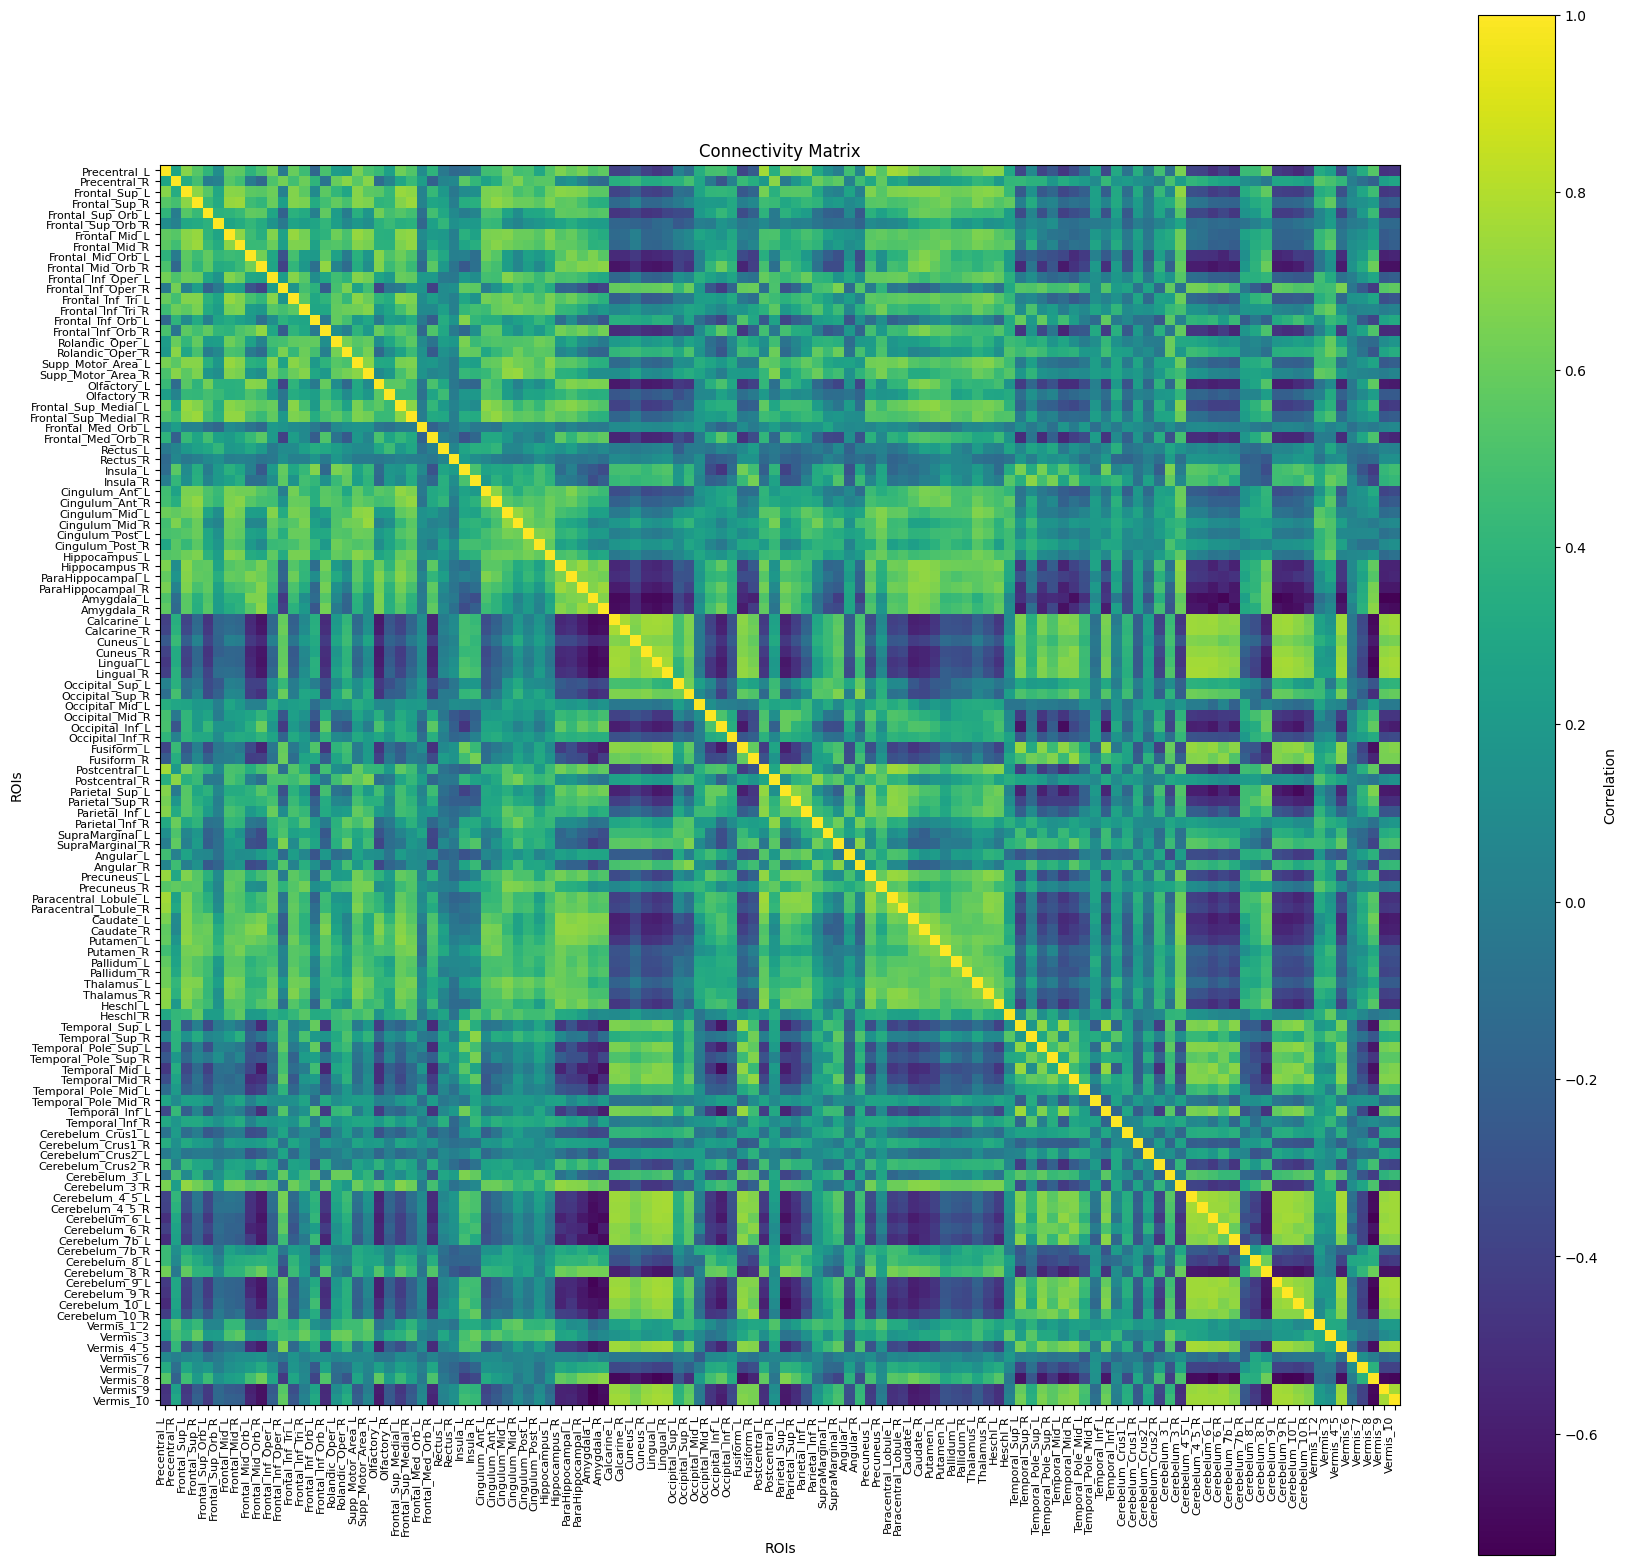

In [11]:

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(CN_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [12]:
del connectivity_matrix
del time_series
del correlation_measure
del correlation_matrices

In [13]:


# EMCI patient


dicom_folder = "/Users/mariamannone/Downloads/ADNI 8/012_S_4012/Resting_State_fMRI/2013-05-16_11_59_31.0/I372938"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_EMCI"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)



/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.08160129127576196630'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [14]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_EMCI/output.nii.gz/501_resting_state_fmri.nii.gz"

#fmri_img = nib.load(nifti_file)

# Load the AAL atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



In [15]:
EMCI_matrix = connectivity_matrix

In [16]:
del connectivity_matrix
del time_series
del correlation_measure
del correlation_matrices

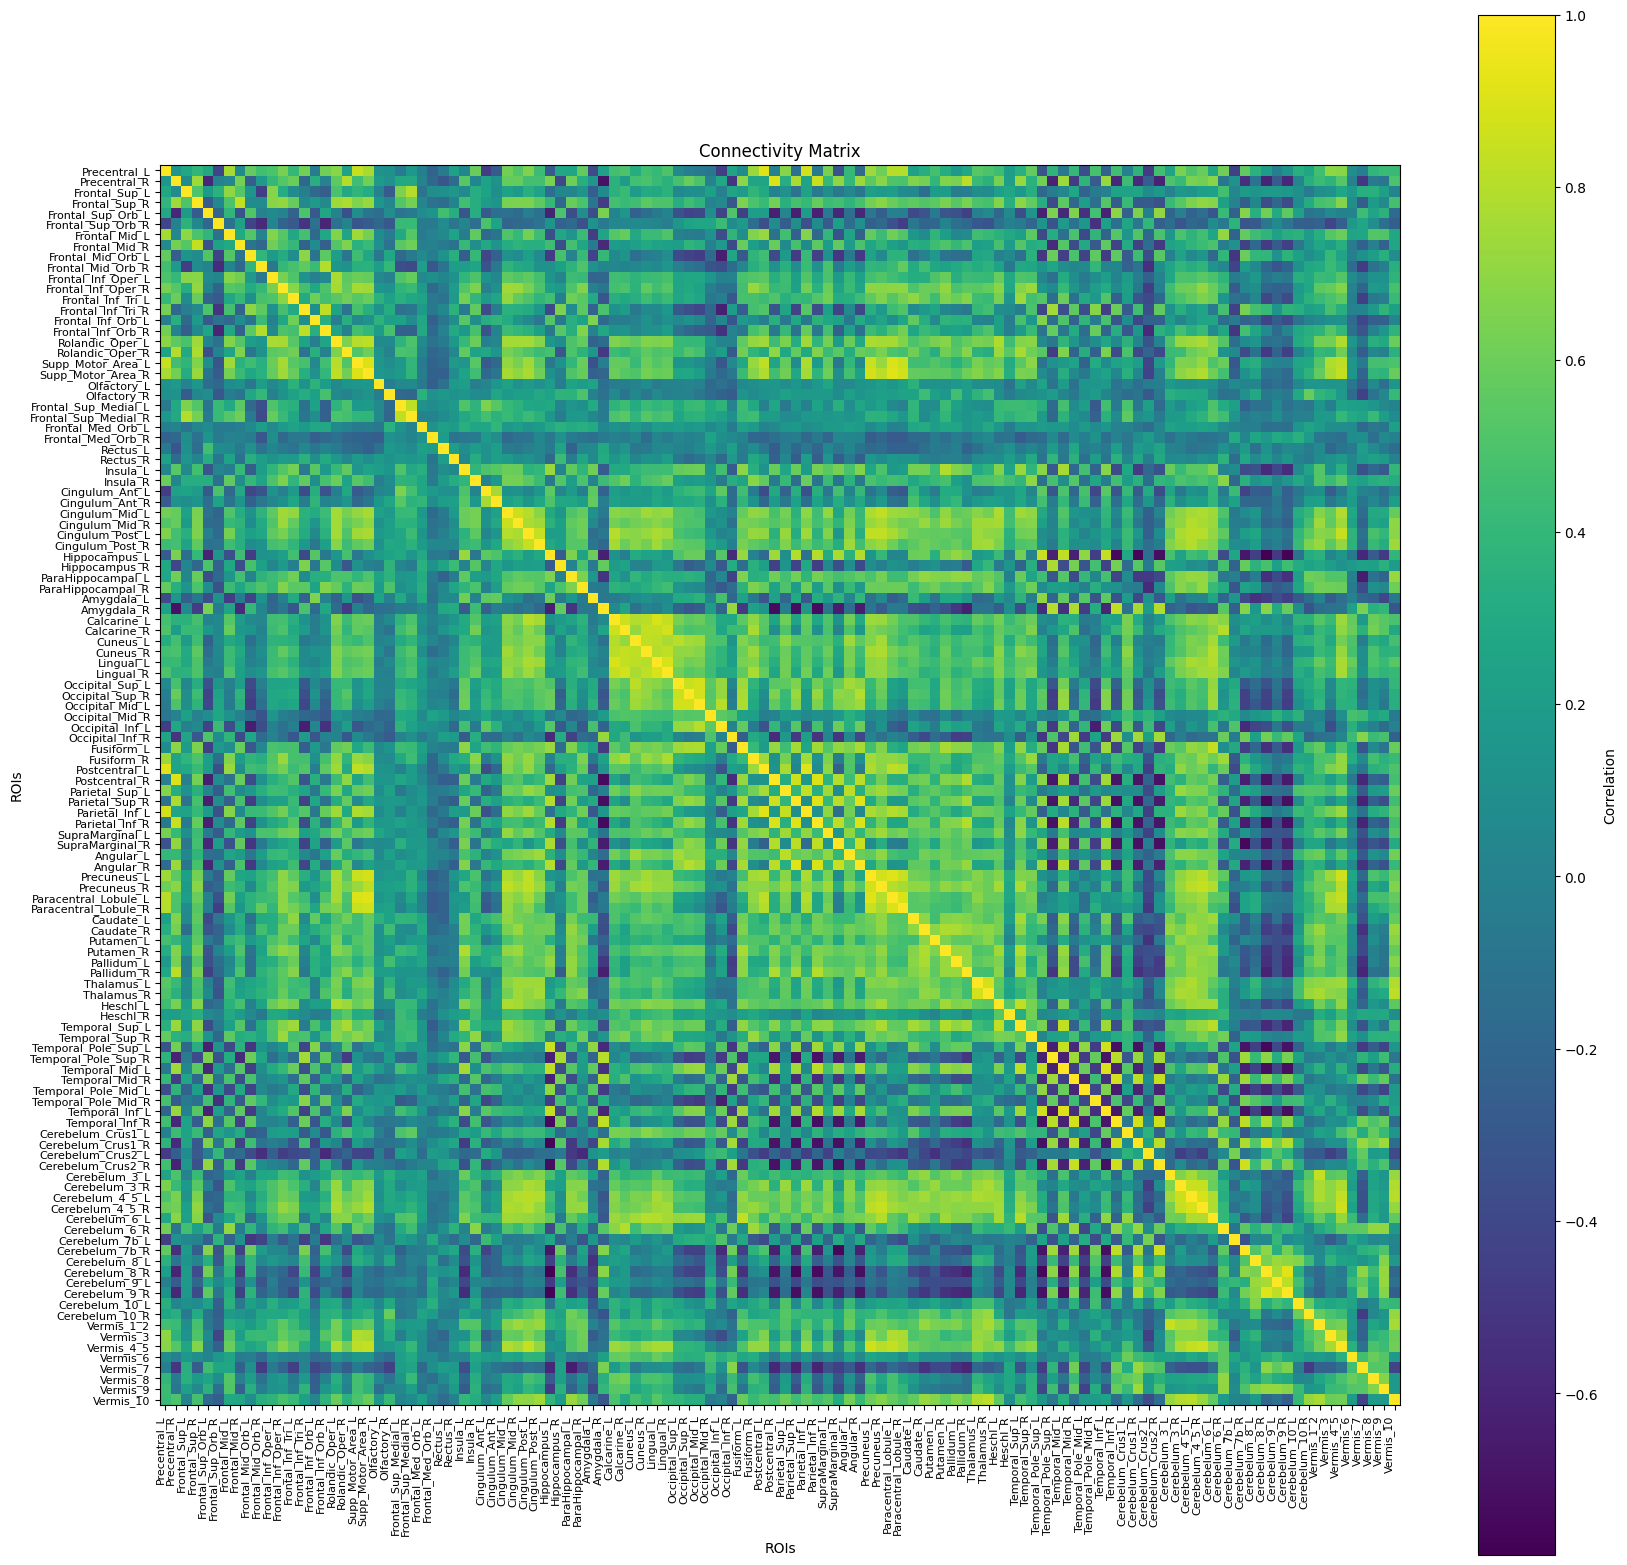

In [17]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(EMCI_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [18]:


# LMCI patient


dicom_folder = "/Users/mariamannone/Downloads/ADNI 8/031_S_4203/Resting_State_fMRI/2013-09-23_14_53_03.0/I391665"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_LMCI"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)



/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06883781551784571636'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [19]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_LMCI/output.nii.gz/601_resting_state_fmri.nii.gz"

#fmri_img = nib.load(nifti_file)

# Load the AAL atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



In [20]:
LMCI_matrix = connectivity_matrix

In [21]:
del connectivity_matrix
del time_series
del correlation_measure
del correlation_matrices

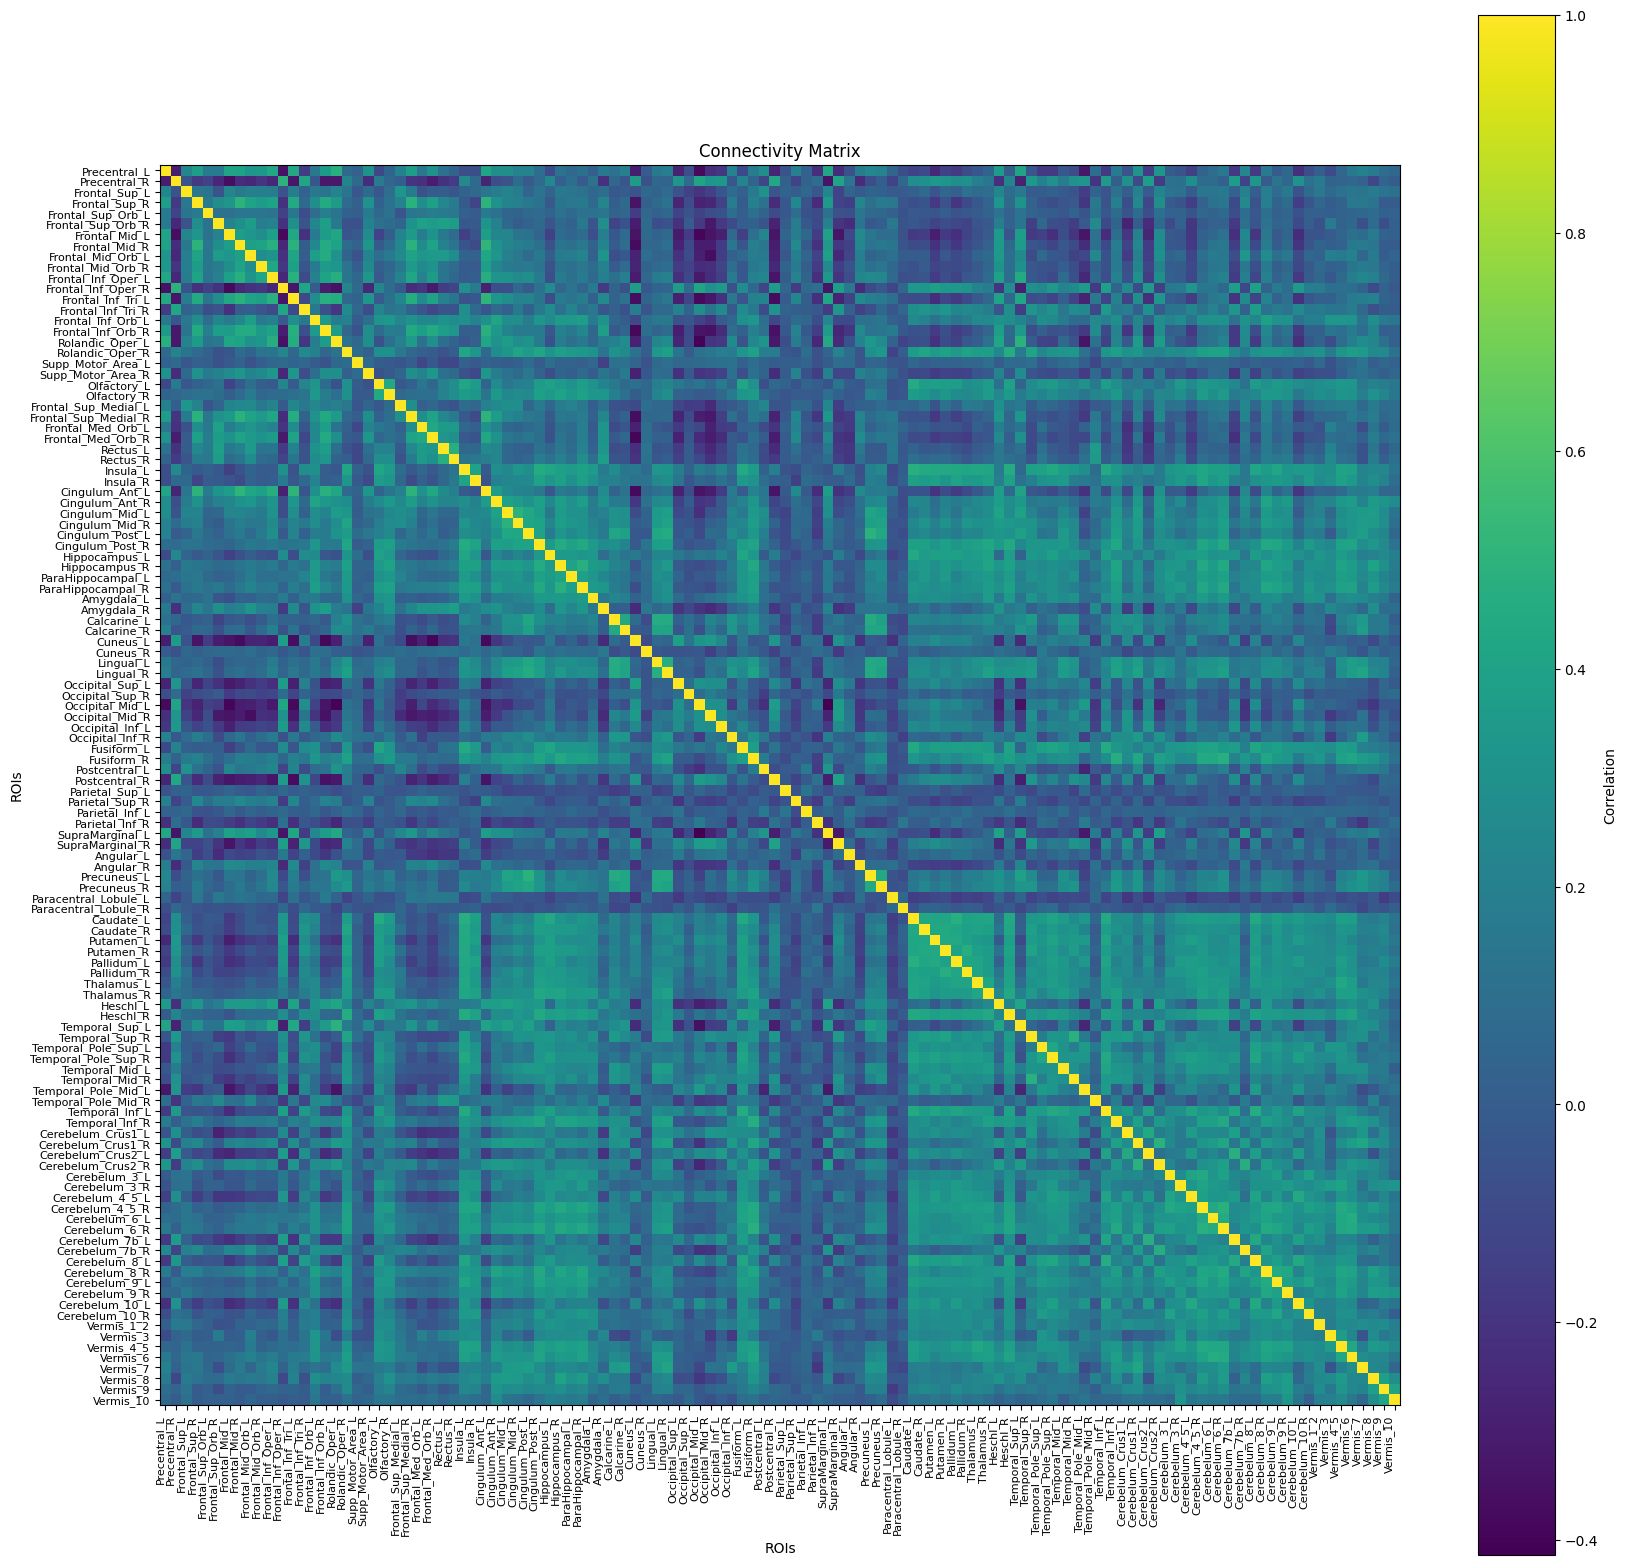

In [22]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(LMCI_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

In [23]:


# AD patient

# 018_S_4696 not 031_S_4203

dicom_folder = "/Users/mariamannone/Downloads/ADNI 10/018_S_4696/Resting_State_fMRI/2012-05-01_13_41_59.0/I301395"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_AD"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)



/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.03063941057727378469'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06502357585872528492'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06130485761868266775'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydico

In [24]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_AD/output.nii.gz/601_resting_state_fmri.nii.gz"

#fmri_img = nib.load(nifti_file)

# Load the AAL atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



In [25]:
AD_matrix = connectivity_matrix

In [26]:
del connectivity_matrix
del time_series
del correlation_measure
del correlation_matrices

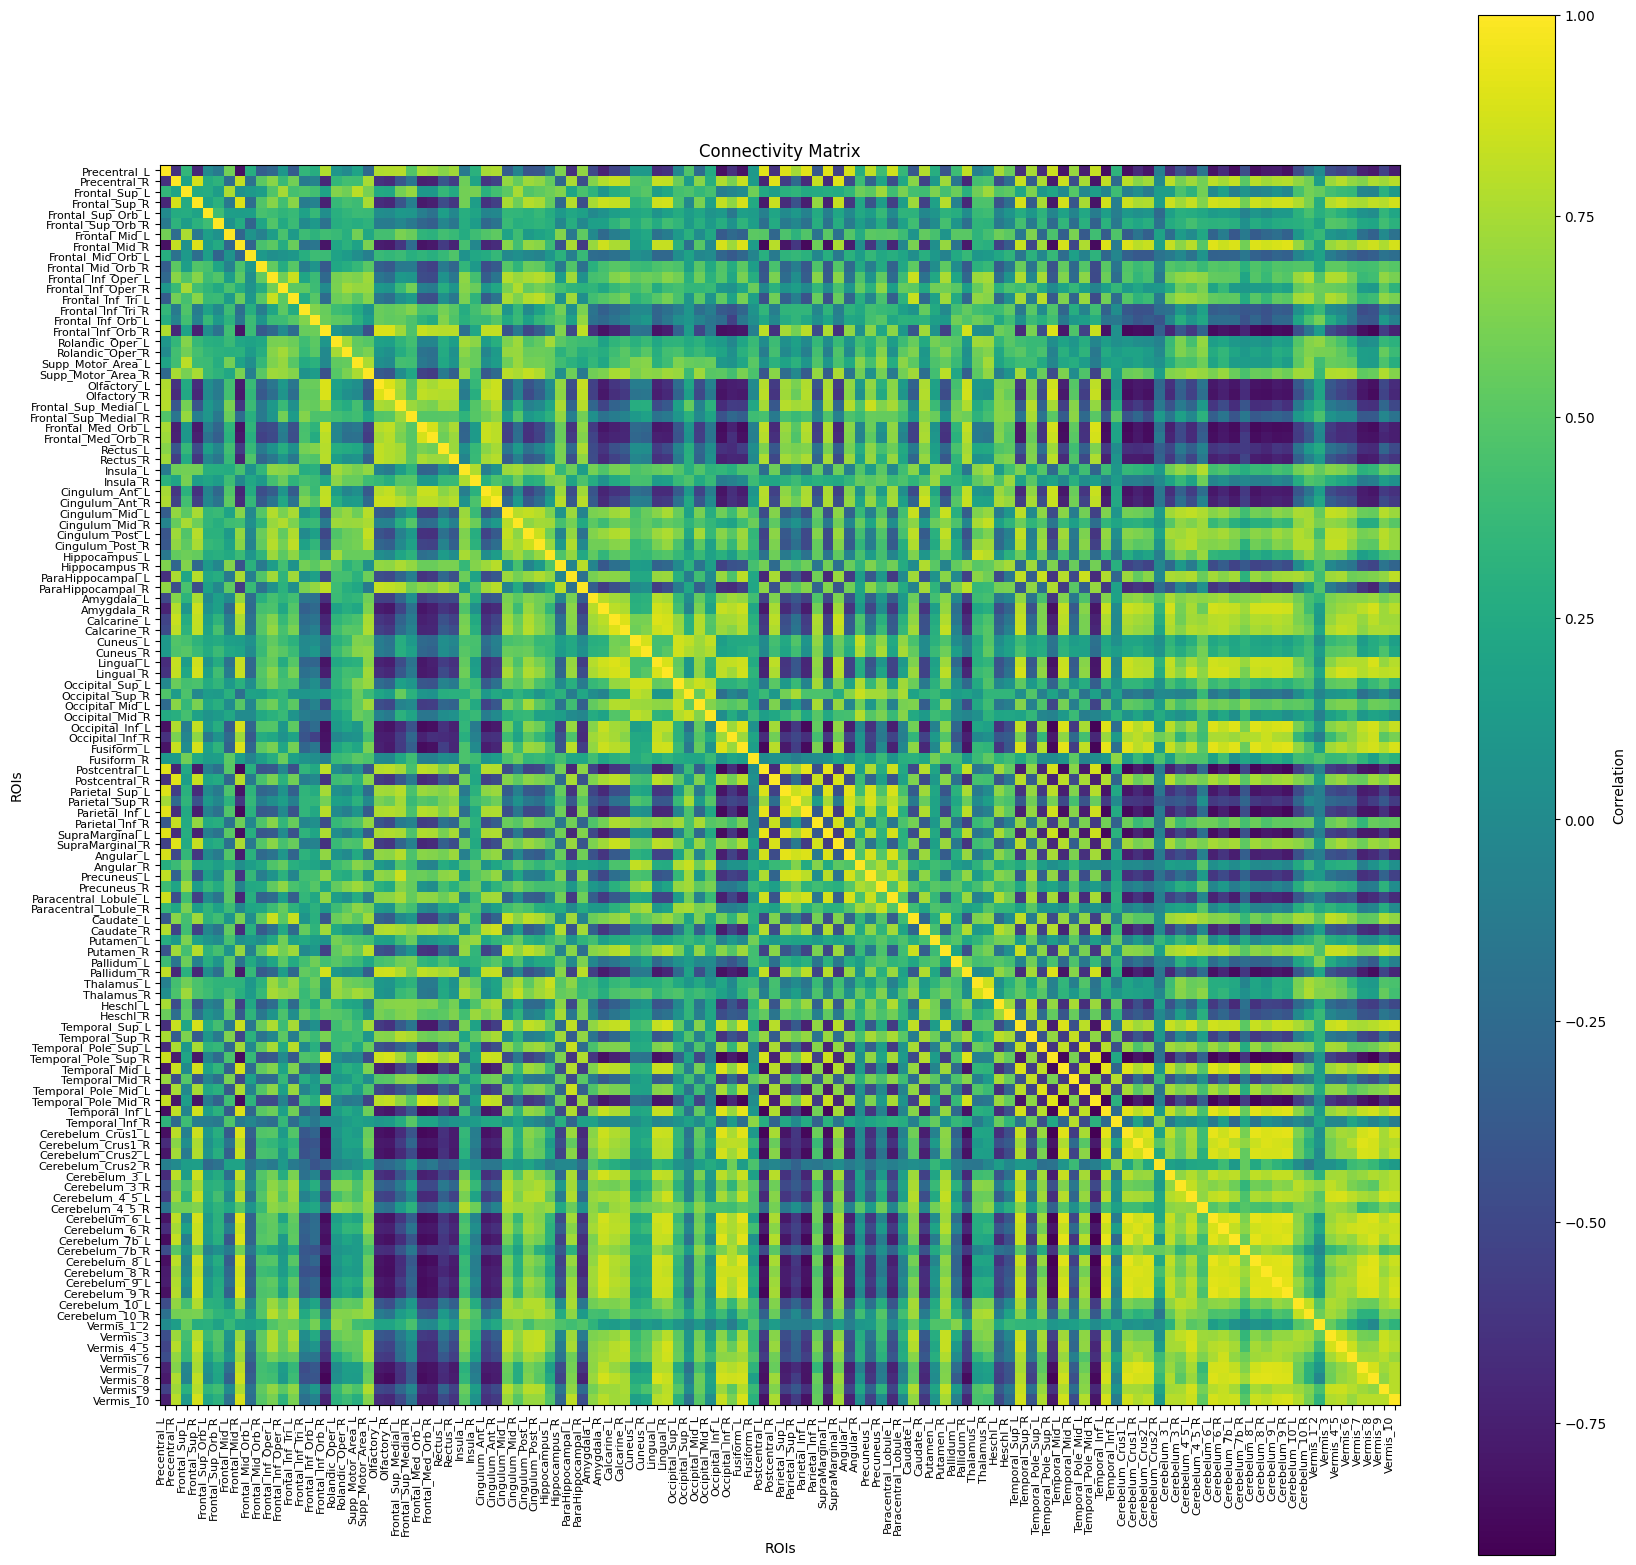

In [27]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(AD_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

In [28]:
# Size check

In [29]:
print("Time series length for first dataset:", len(CN_matrix))
print("Time series length for second dataset:", len(EMCI_matrix))
print("Time series length for second dataset:", len(LMCI_matrix))
print("Time series length for second dataset:", len(AD_matrix))

print("Number of ROIs for first dataset:", CN_matrix.shape[1])
print("Number of ROIs for second dataset:", EMCI_matrix.shape[1])
print("Number of ROIs for second dataset:", LMCI_matrix.shape[1])
print("Number of ROIs for second dataset:", AD_matrix.shape[1])


size1 = CN_matrix.size
size2 = EMCI_matrix.size
size3 = LMCI_matrix.size
size4 = AD_matrix.size
print(size1, size2, size3, size4)

Time series length for first dataset: 116
Time series length for second dataset: 116
Time series length for second dataset: 116
Time series length for second dataset: 116
Number of ROIs for first dataset: 116
Number of ROIs for second dataset: 116
Number of ROIs for second dataset: 116
Number of ROIs for second dataset: 116
13456 13456 13456 13456


In [30]:
# And now, the three K-operators for the comparisons, filtered according to the ROIs for AD. But include the Vermis IX.

In [31]:
K1 = EMCI_matrix * np.linalg.inv(CN_matrix)

K2 = LMCI_matrix * np.linalg.inv(EMCI_matrix)

K3 = AD_matrix * np.linalg.inv(LMCI_matrix)

K4 = AD_matrix * np.linalg.inv(CN_matrix)

In [32]:
# Visualizing the filtered K according to an empirical threshold

In [33]:
# Visualize K

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels

# Fetch the AAL atlas and extract the labels
aal_atlas = datasets.fetch_atlas_aal()
roi_names = aal_atlas.labels


# Adjust the figure size to fit all labels
#plt.figure(figsize=(20, 20))

#plt.imshow(K_, cmap='viridis', interpolation='nearest')
#plt.colorbar(label='Correlation')
#plt.title('Connectivity Matrix')

#plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
#plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

#plt.xlabel('ROIs')
#plt.ylabel('ROIs')
#plt.show()

In [34]:
# filtering out the smaller elements

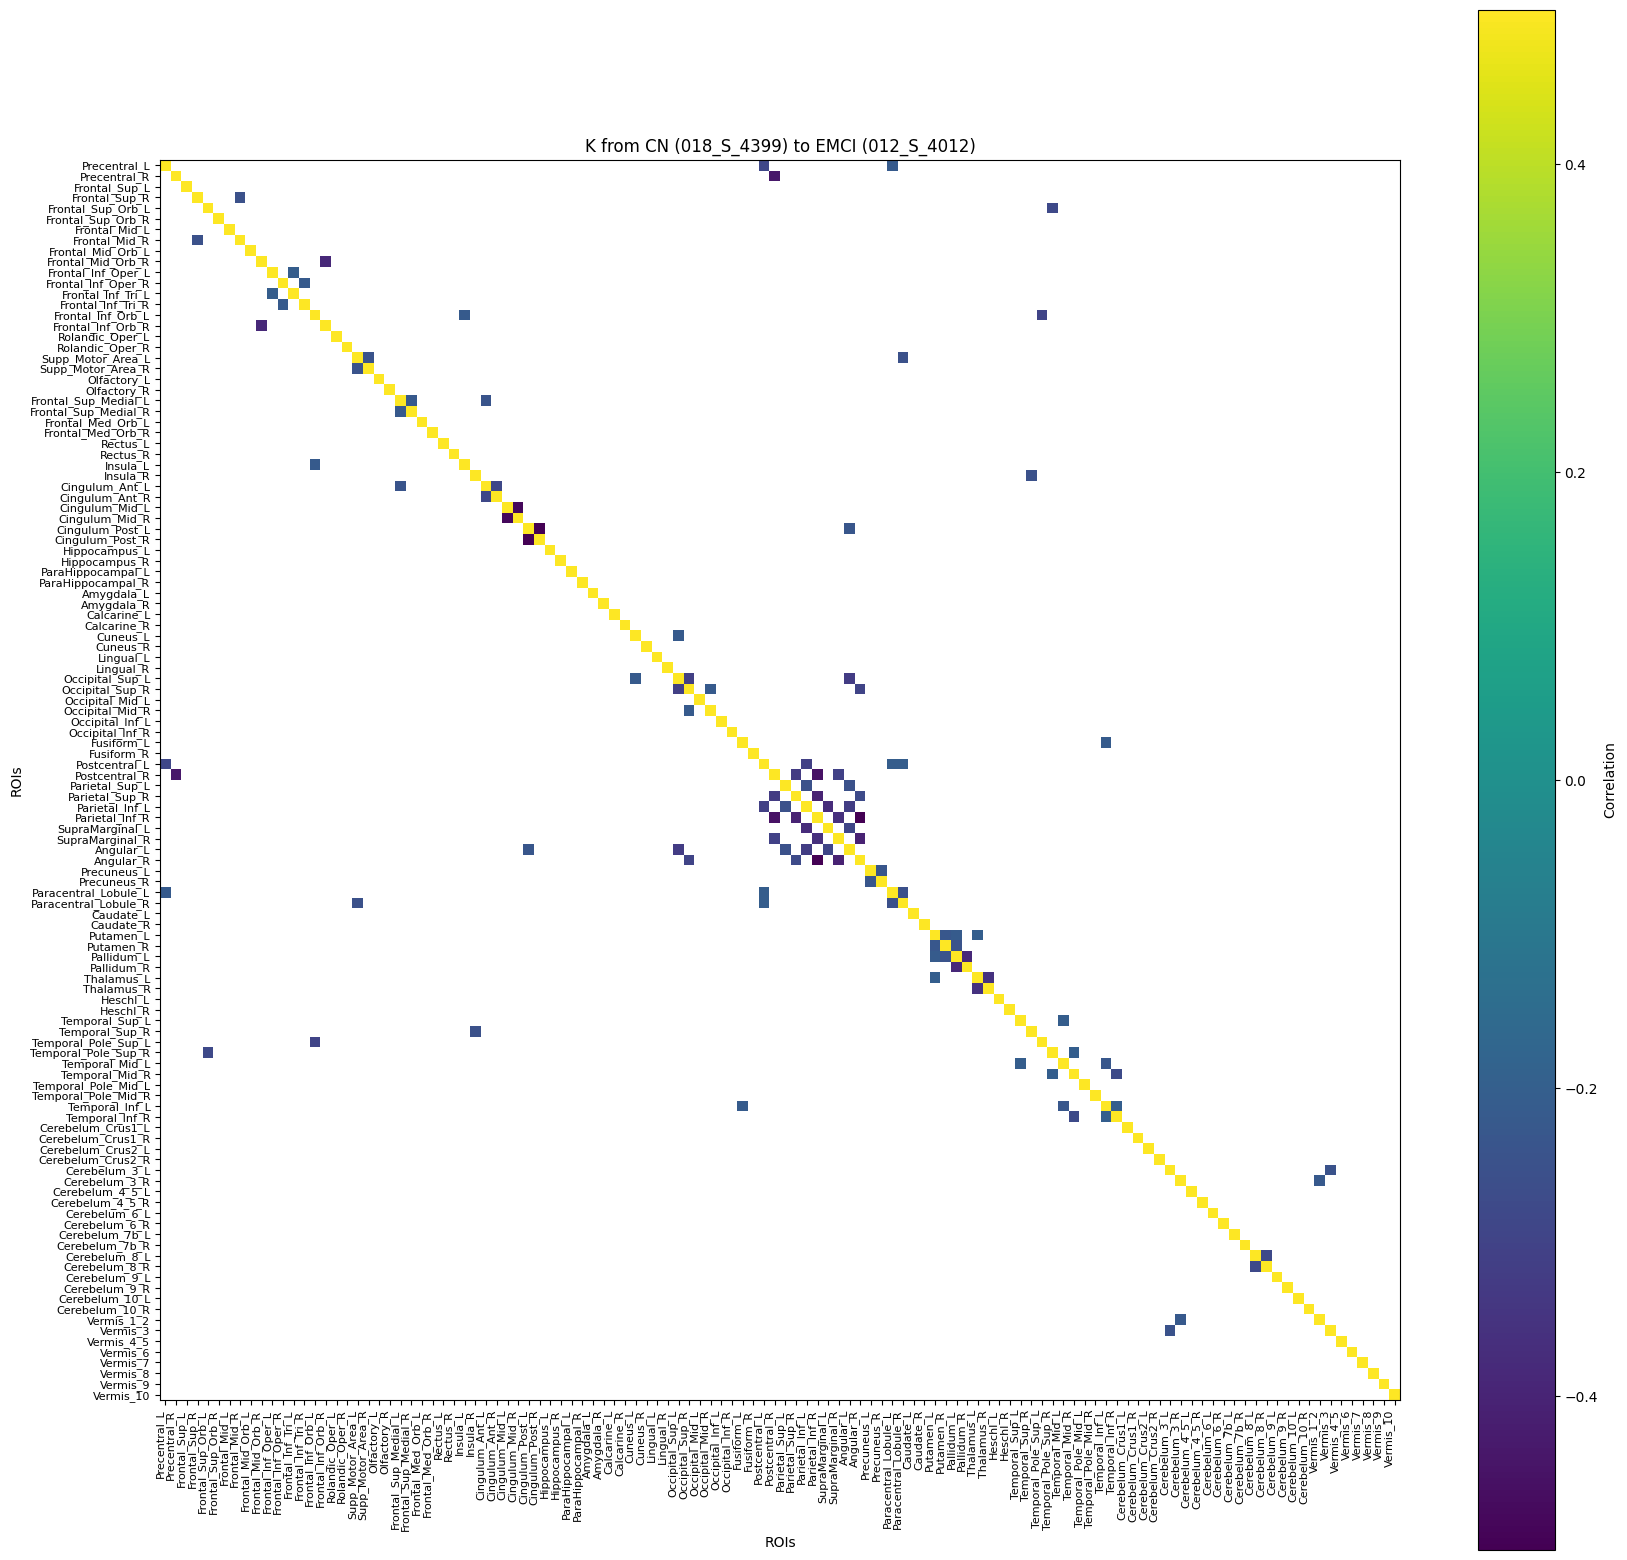

In [70]:

# Filtered K1


threshold = 0.2

# Create a boolean mask for the condition
mask = np.abs(K1) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix1 = np.where(mask, K1, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

vmin, vmax = -0.5, 0.5
plt.imshow(filtered_matrix1, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)

plt.colorbar(label='Correlation')
plt.title('K from CN (018_S_4399) to EMCI (012_S_4012)')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.savefig('K_from_CN_to_EMCI.png', dpi=300)
plt.show()

del threshold

In [62]:
# major effects: occipital and the other areas; hippocampus and cerebellum; temporal and cerebellum; cerebellum and vermis

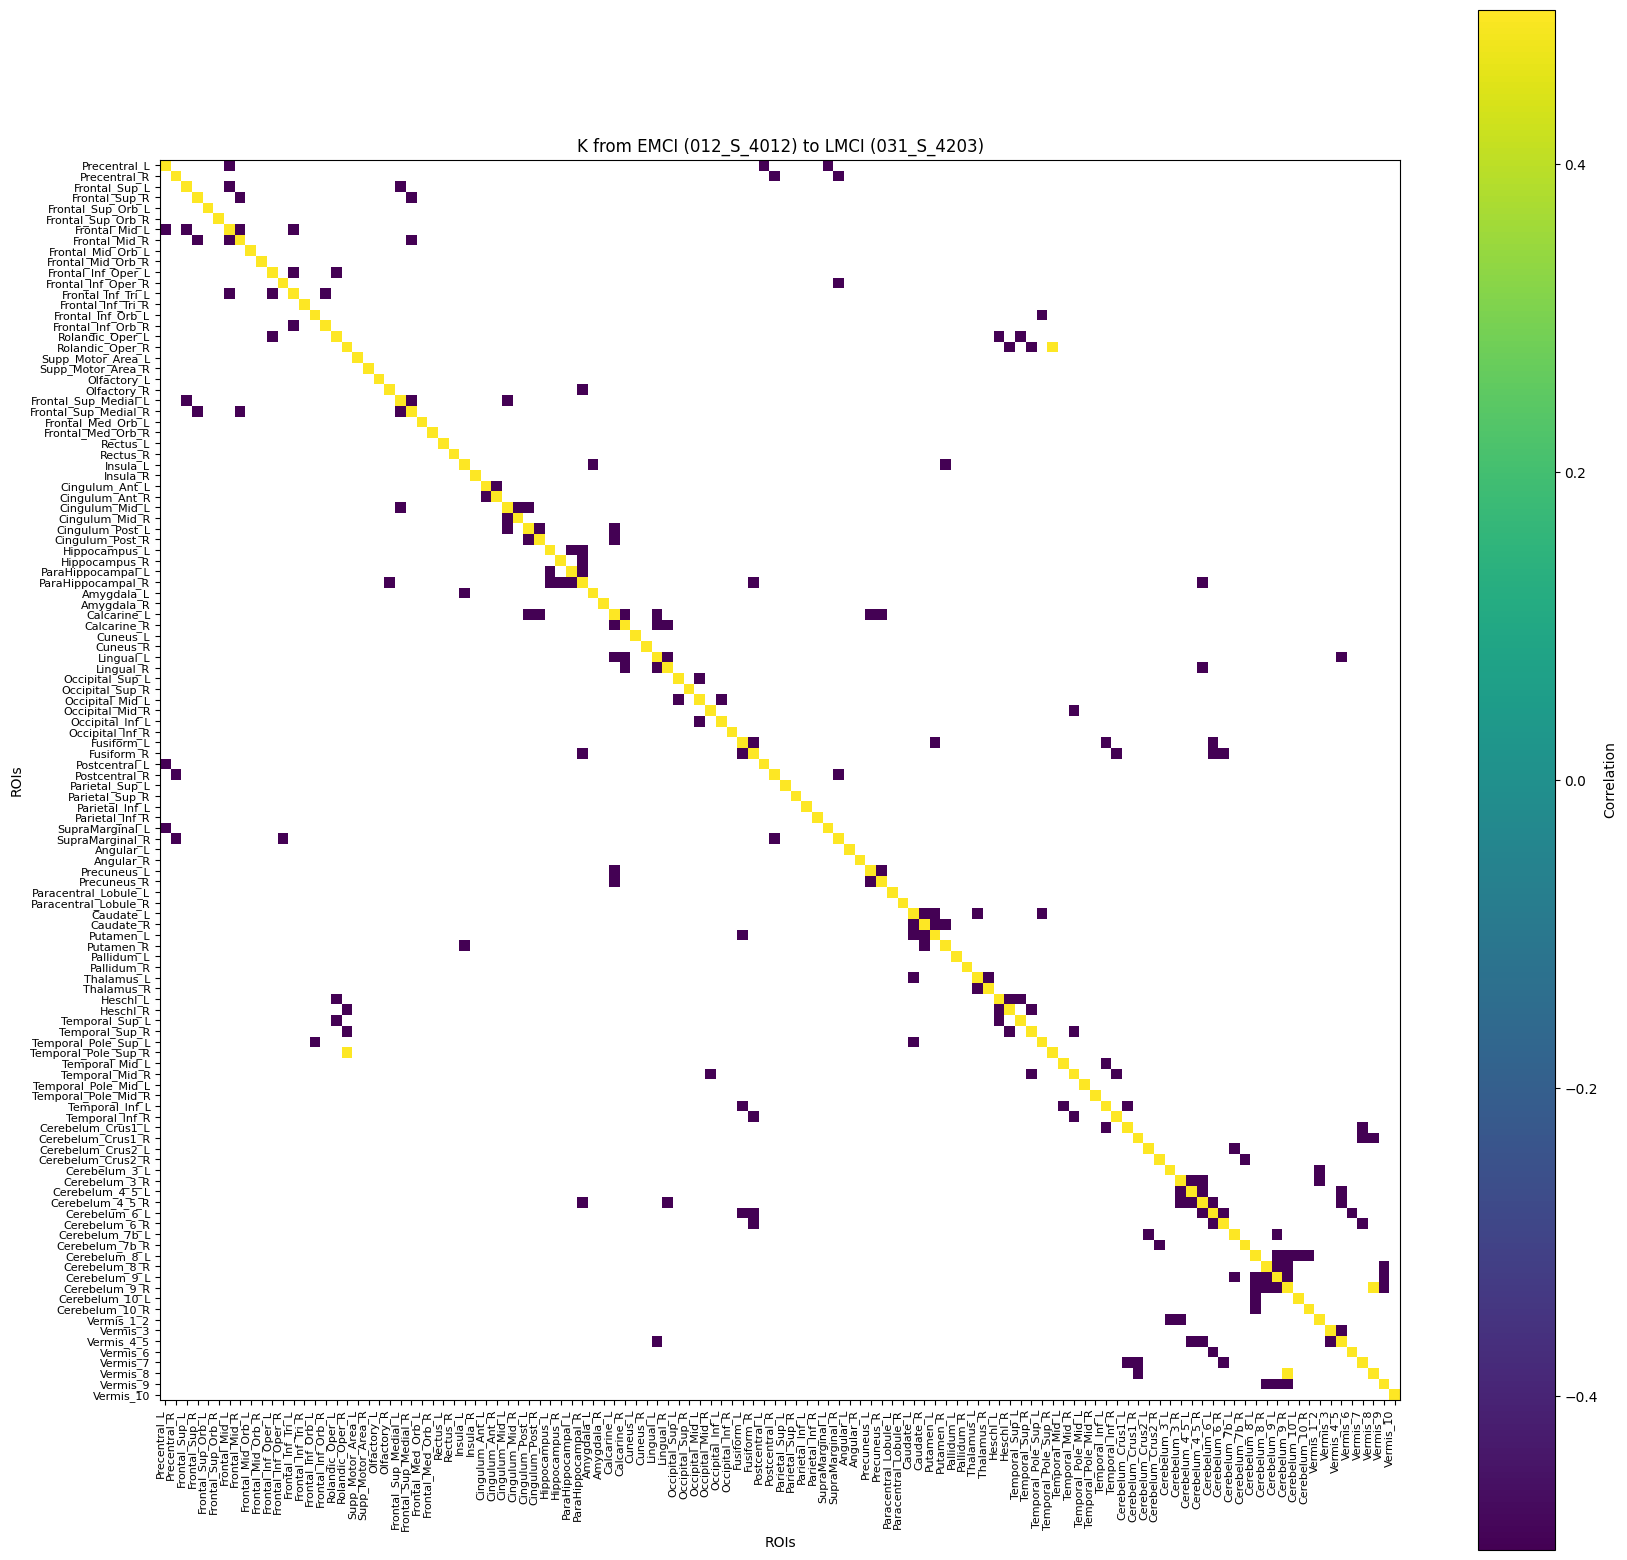

In [72]:

# Filtered K2


threshold = 0.5

# Create a boolean mask for the condition
mask = np.abs(K2) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix2 = np.where(mask, K2, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

vmin, vmax = -0.5, 0.5
plt.imshow(filtered_matrix2, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)

plt.colorbar(label='Correlation')
plt.title('K from EMCI (012_S_4012) to LMCI (031_S_4203)')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.savefig('K_from_EMCI_to_LMCI.png', dpi=300)
plt.show()

del threshold

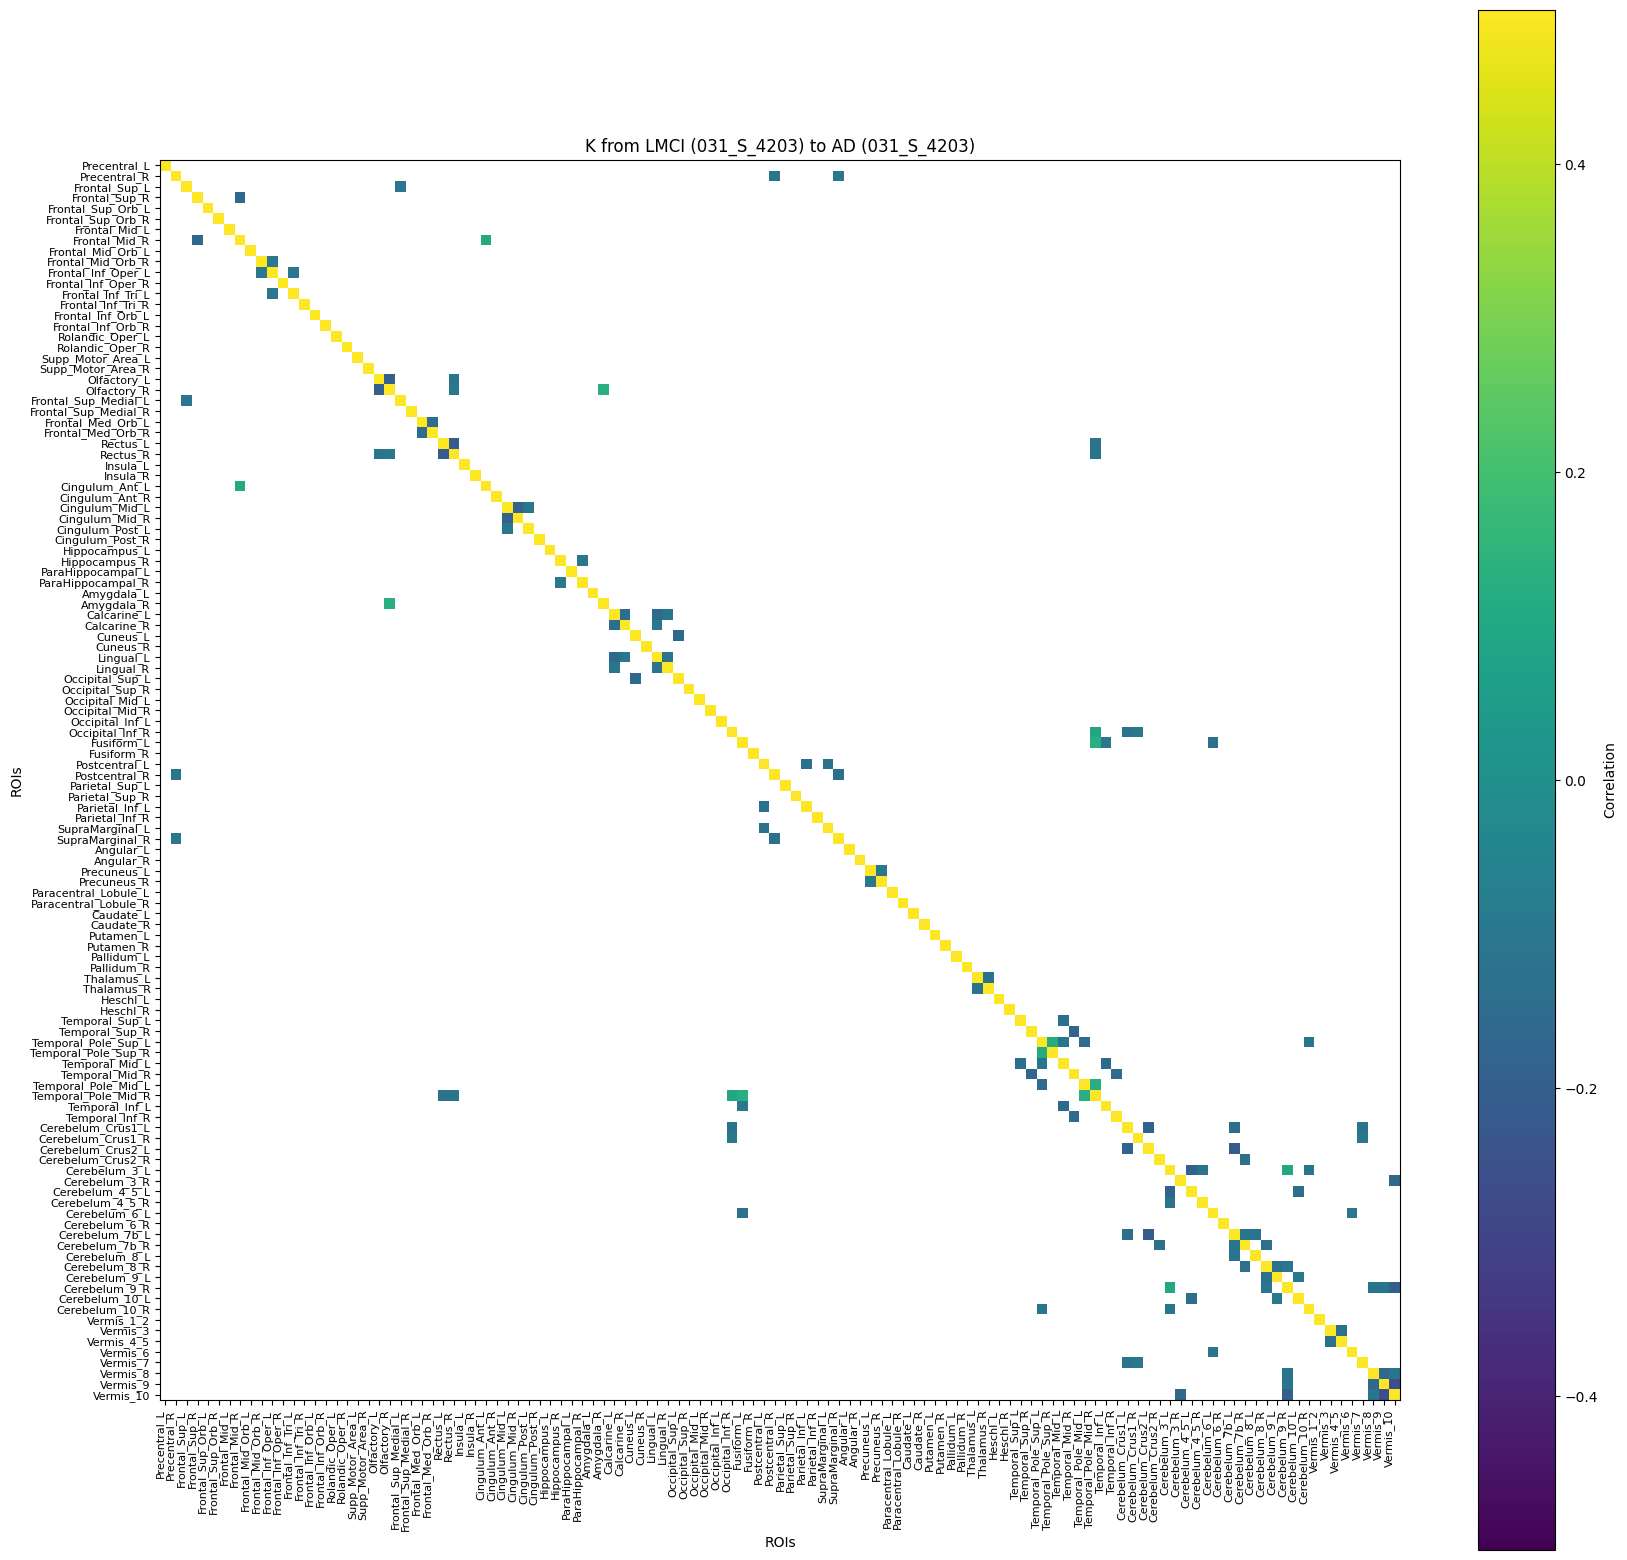

In [74]:

# Filtered K3


threshold = 0.1

# Create a boolean mask for the condition
mask = np.abs(K3) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix3 = np.where(mask, K3, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

vmin, vmax = -0.5, 0.5
plt.imshow(filtered_matrix3, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)

plt.colorbar(label='Correlation')
plt.title('K from LMCI (031_S_4203) to AD (031_S_4203)')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.savefig('K_from_LMCI_to_AD.png', dpi=300)
plt.show()

del threshold

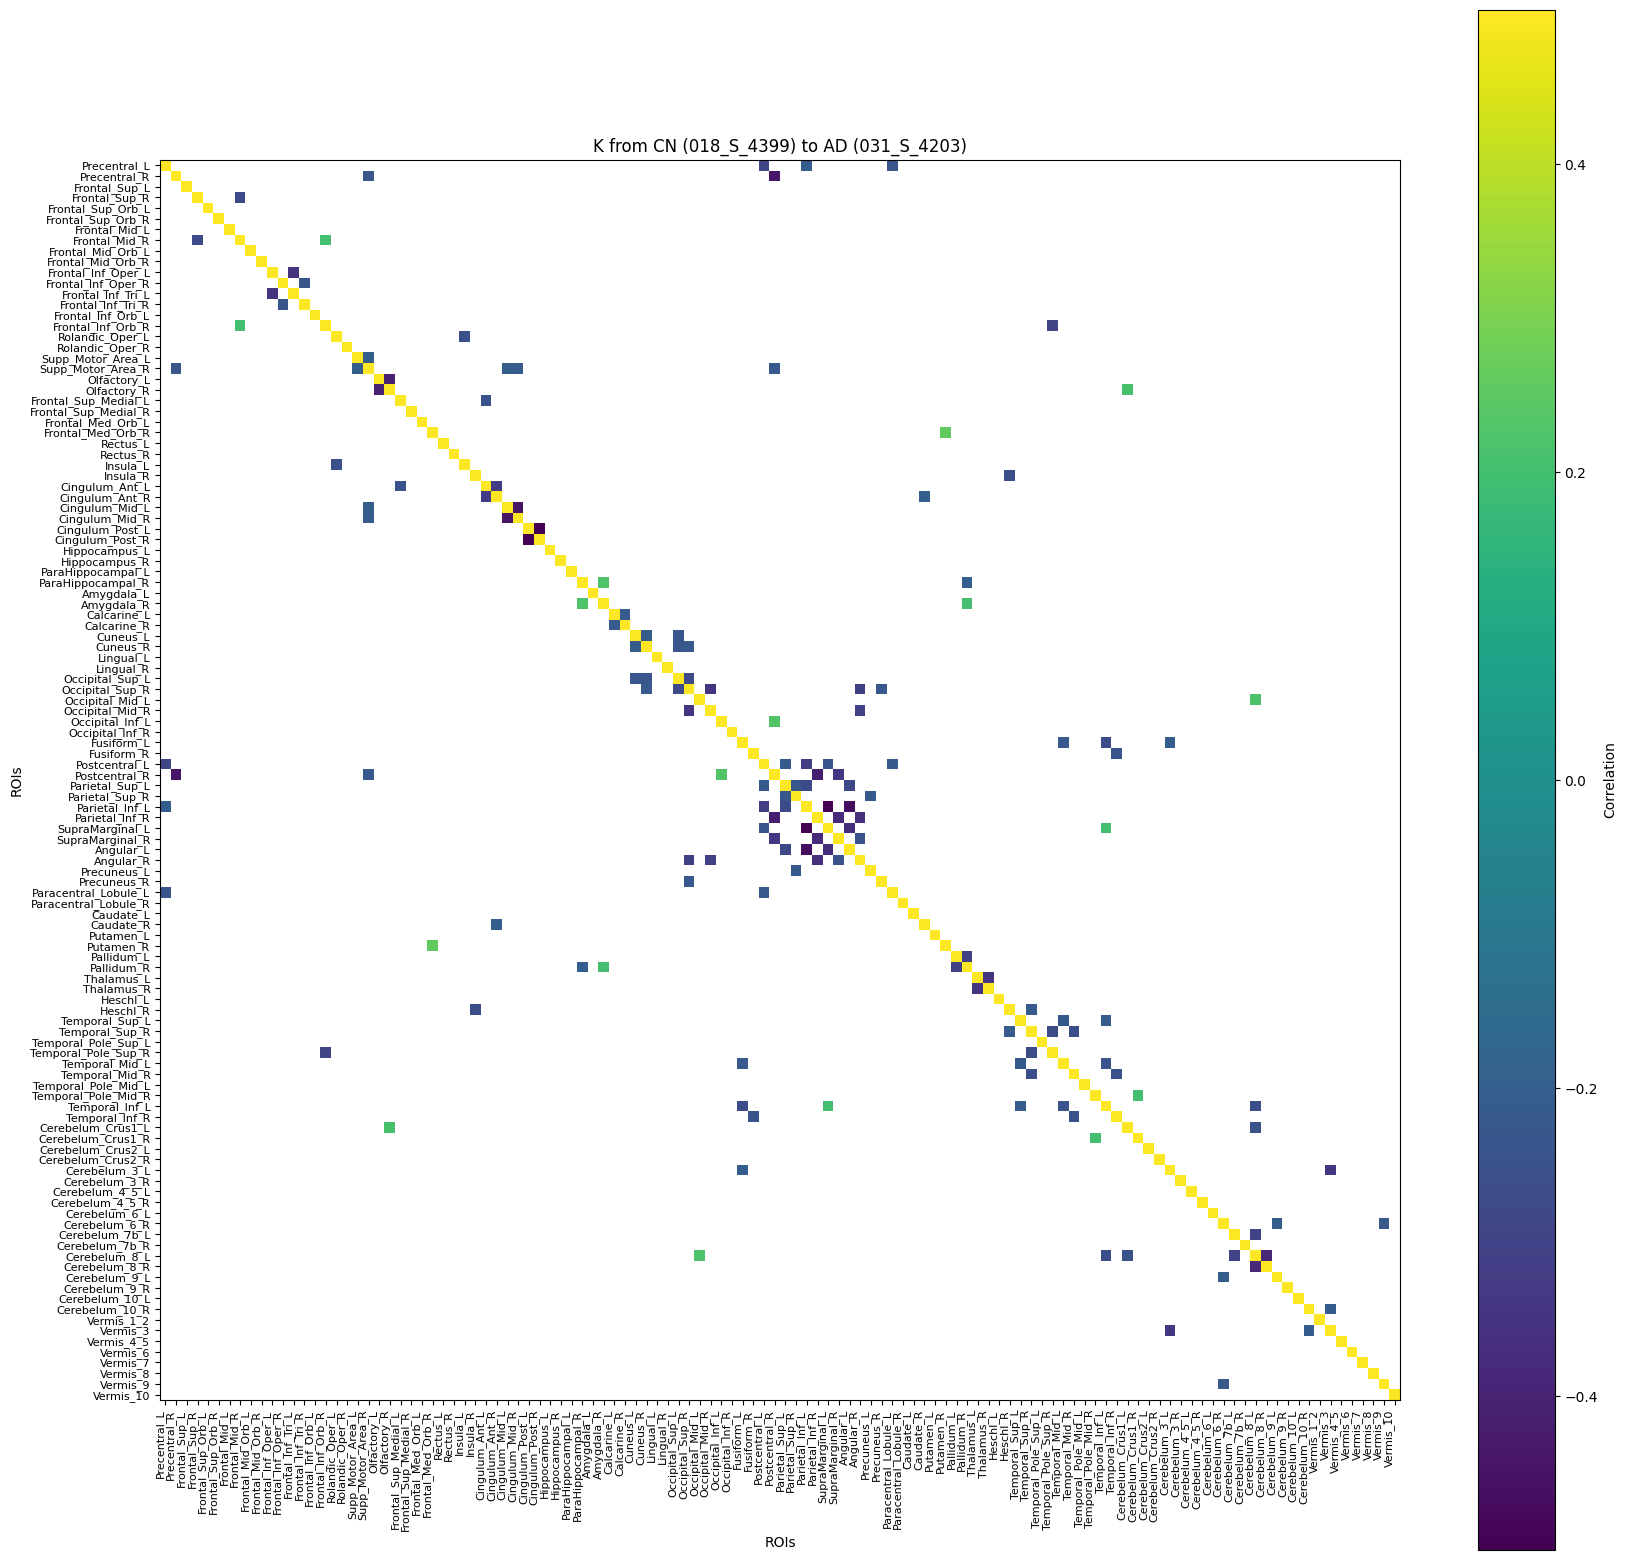

In [75]:

# Filtered K4


threshold = 0.2

# Create a boolean mask for the condition
mask = np.abs(K4) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix4 = np.where(mask, K4, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

vmin, vmax = -0.5, 0.5
plt.imshow(filtered_matrix4, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)

plt.colorbar(label='Correlation')
plt.title('K from CN (018_S_4399) to AD (031_S_4203)')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.savefig('K_from_CN_to_AD.png', dpi=300)
plt.show()

del threshold

In [40]:
# Change the choice of ROIs, and add Amygdala and Vermis_9

In [51]:
from nilearn import datasets

# Fetch the AAL atlas
aal = datasets.fetch_atlas_aal()

# Extract the labels from the AAL atlas
atlas_labels = aal.labels

# List of ROIs to find indices for
roi_names_selection = [
    "Occipital_Mid_R", "Occipital_Inf_L", "Occipital_Inf_R", "Fusiform_L", "Postcentral_R", 
    "Supramarginal_R", "Cerebelum_Crus1_R", "Cerebelum_3_L", "Cerebelum_4_5_R", "Cerebelum_8_L",
    "Cerebelum_9_R", "Cerebelum_10_L", "Cerebelum_10_R", "Vermis_6", "Vermis_7", "Vermis_8", 
    "Cingulum_Post_R", "Frontal_Inf_Tri_R", "Precentral_R", "Frontal_Sup_L", "Heschl_L", 
    "Pallidum_L", "Parietal_Inf_L", "Occipital_Mid_L", "Hippocampus_L", "Hippocampus_R",
    "ParaHippocampal_L", "Temporal_Mid_L", "Temporal_Mid_R", "ParaHippocampal_R", "Amygdala", "Vermis_9"
]

# Get the indices for the specified ROI names
roi_indices_selection = [i for i, label in enumerate(atlas_labels) if label in roi_names_selection]

print("Indices for the specified ROIs:", roi_indices_selection)


Indices for the specified ROIs: [1, 2, 13, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 57, 60, 74, 78, 84, 85, 91, 94, 97, 102, 105, 106, 107, 111, 112, 113, 114]


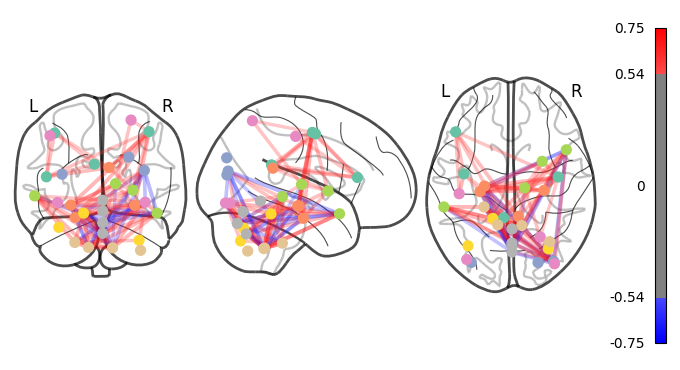

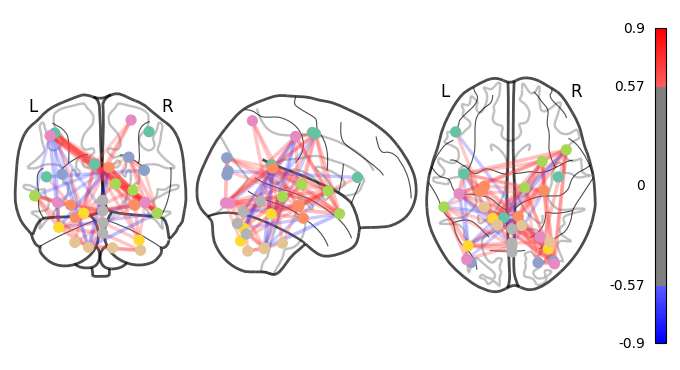

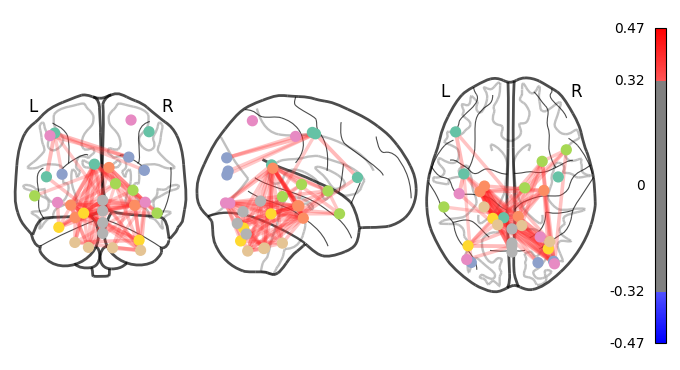

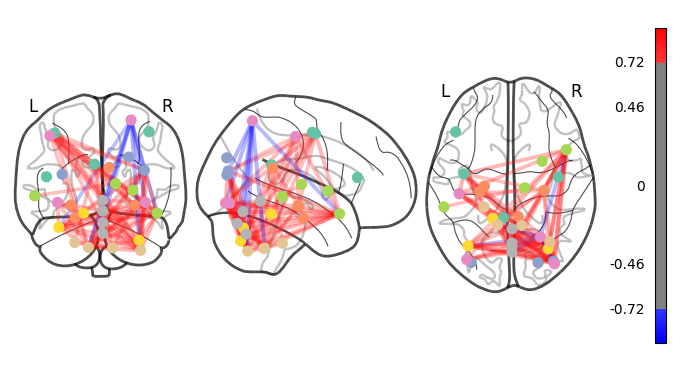

In [54]:
import numpy as np
from nilearn import datasets, plotting, input_data, connectome
import nibabel as nib

# Fetch the AAL atlas
aal_atlas = datasets.fetch_atlas_aal()

# Get the map and labels from the AAL atlas
atlas_filename = aal_atlas['maps']
atlas_labels = aal_atlas['labels']

# Load the NIfTI image to access coordinates
atlas_img = nib.load(atlas_filename)

# The coordinates for each ROI are obtained from the affine transformation
# and the indices where the atlas has a specific ROI value
unique_roi_values = np.unique(atlas_img.get_fdata())
roi_coords = []

# Find the center of each ROI in the atlas
for roi_value in unique_roi_values:
    if roi_value != 0:  # Skip background (value 0)
        roi_indices = np.argwhere(atlas_img.get_fdata() == roi_value)
        roi_center = np.mean(roi_indices, axis=0)  # Compute the mean position
        roi_coords.append(nib.affines.apply_affine(atlas_img.affine, roi_center))

# Now you have the coordinates for each ROI
roi_indices = [1, 2, 13, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 57, 60, 74, 78, 84, 85, 91, 94, 97, 102, 105, 106, 107, 111, 112, 113, 114]

# Extract only the coordinates that correspond to your selection
selected_coords = [roi_coords[i - 1] for i in roi_indices]

# Example: Filter a connectivity matrix to these indices
# Assuming you have a connectivity matrix
# connectivity_matrix = np.random.rand(116, 116)  # Replace with your matrix
CN_matrix_partial = CN_matrix[np.ix_(roi_indices, roi_indices)]
EMCI_matrix_partial = EMCI_matrix[np.ix_(roi_indices, roi_indices)]
LMCI_matrix_partial = LMCI_matrix[np.ix_(roi_indices, roi_indices)]
AD_matrix_partial = AD_matrix[np.ix_(roi_indices, roi_indices)]

edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}

# Plot the filtered connectome with the selected coordinates
plotting.plot_connectome(CN_matrix_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('CN_matrix_partial_baseline_partial_connectome_ADNI_018_S_4399.png', dpi=300)
plotting.show()

plotting.plot_connectome(EMCI_matrix_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('EMCI_matrix_partial_baseline_partial_connectome_ADNI_012_S_4012.png', dpi=300)
plotting.show()

plotting.plot_connectome(LMCI_matrix_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('LMCI_matrix_partial_baseline_partial_connectome_ADNI_031_S_4203.png', dpi=300)
plotting.show()

plotting.plot_connectome(AD_matrix_partial, selected_coords, edge_threshold="80%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('AD_matrix_partial_baseline_partial_connectome_ADNI_018_S_4696.png', dpi=300)
plotting.show()


In [ ]:
# female

In [ ]:
# test patient

In [ ]:
# prediction with MLP